Setting up the functions to perform the training and data recording

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

phones = pd.read_csv('phone_final.csv')
phones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
features = phones.drop('price_range',axis=1)
labels = phones['price_range']

#split features and labels into train (70%), test (15%), and validation (15%) sets
#f for features
#l for labels
def split_features(features,labels):
    f_train, f_test, l_train, l_test = train_test_split(features,labels, test_size=0.3,random_state=42)
    f_val, f_test, l_val, l_test = train_test_split(f_test,l_test, test_size=0.5,random_state=42)
    
    return f_train, f_test, f_val, l_train, l_test, l_val

In [8]:
def svm_trainer(features,labels,train_count):
    svc = SVC()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        svc.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = svm_trainer(features,labels,train_count=10)
#print("done!")

In [9]:
def knn_trainer(features,labels,train_count):
    knn = KNeighborsClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        knn.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = knn_trainer(features,labels,train_count=10)
#print("done!")

In [10]:
def logistic_regression_trainer(features,labels,train_count):
    lr = LogisticRegression()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        lr.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = logistic_regression_trainer(features,labels,train_count=10)
#print("done!")

In [11]:
def multilayer_perceptron_trainer(features,labels,train_count):
    MLP = MLPClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        MLP.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = multilayer_perceptron_trainer(features,labels,train_count=10)
#print("done!")

In [12]:
def random_forest_trainer(features,labels,train_count):
    rf = RandomForestClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        rf.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = random_forest_trainer(features,labels,train_count=10)
#print("done!")

In [13]:
knn_times = knn_trainer(features,labels,train_count=10)
lr_times = logistic_regression_trainer(features,labels,train_count=10)
svm_times = svm_trainer(features,labels,train_count=10)
rf_times = random_forest_trainer(features,labels,train_count=10)
mlp_times = multilayer_perceptron_trainer(features,labels,train_count=10)

round 0
round 0
round 0
round 0
round 0


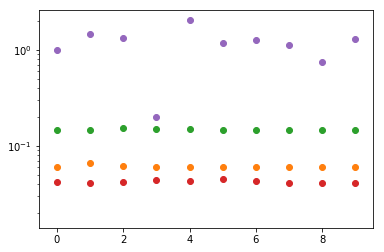

In [14]:
plt.scatter(range(len(knn_times)),knn_times)
plt.scatter(range(len(lr_times)),lr_times)
plt.scatter(range(len(svm_times)),svm_times)
plt.scatter(range(len(rf_times)),rf_times)
plt.scatter(range(len(mlp_times)),mlp_times)
plt.yscale('log')
plt.show()